<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/ps2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***An Investigation into the Challenges Facing the New Competence Based Curriculum in Kenya ***

**Research Purpose**
The goal of this research is to examine the effect of the increase in population on the education system in Kenya over the past 15 years. Specifically, I am interested in understanding how population growth affects the new Competence Based Curriculum whose implementation started recently. Presumably, population growth signficantly affects education on the account that it impacts the enrollment rates in public and privates schools, which in turn exerts pressure on the existing school infrastructure, which affects the government's expenditure on education.

In [229]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
#!pip install geopandas matplotlib folium

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [230]:
!pip install mapclassify
import mapclassify #need for thematic map classification

 2019-population_census-report-per-county.csv
 2019-population_census-report-per-county.csv.1
 2019-population_census-report-per-county.csv.2
 2019-population_census-report-per-county.csv.3
 2019-population_census-report-per-county.csv.4
 2019-population_census-report-per-county.csv.5
 County.dbf
 County.prj
 County.sbn
 County.sbx
 County.shp
 County.shp.xml
 County.shx
 kenya_administrative_province_boundaries.dbf
 kenya_administrative_province_boundaries.prj
 kenya_administrative_province_boundaries.shp
 kenya_administrative_province_boundaries.shx
 kenya_counties1.zip
 kenya_counties.zip
 kenya_prov.zip
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.1
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.2
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.3
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.4
 number-of-secondary-school-enrolment

<Axes: >

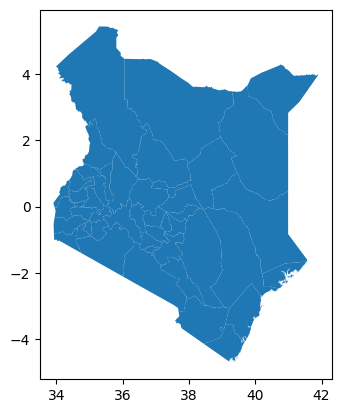

In [231]:
! wget -q -O kenya_counties.zip https://github.com/Brian13Noble/GIS/raw/main/Kenya_Counties.zip
!ls
zip_ref = zipfile.ZipFile('kenya_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kenya_counties=gpd.read_file('/content/County.shp') #load the shapefile with gpd as kenya_counties
#Make the map
kenya_counties.plot()


In [232]:
kenya_counties.dtypes

OBJECTID         int64
AREA           float64
PERIMETER      float64
COUNTY3_       float64
COUNTY3_ID     float64
COUNTY          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [233]:
!wget -q https://github.com/Brian13Noble/GIS/raw/main/number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv

sec_enrollment = pd.read_csv('/content/number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv')
#sec_enrollment

In [234]:
# Change the cases of the counties for easier merging
sec_enrollment['County'] = sec_enrollment['County'].str.capitalize()
sec_enrollment

,County,2007,2008,2009,2010,2011,2012,2013
0,Baringo,17157,19419,21406,24034,25343,27803,30606
1,Bomet,26413,29895,32954,36999,38997,42812,46556
2,Bungoma,53867,60969,67208,75458,78835,87557,95673
3,Busia,21524,24362,26855,30152,31398,35308,38710
4,Elgeyo marakwet,14676,16610,18310,20558,21981,24000,26238
5,Embu,22488,25453,28058,31502,34494,35752,39293
6,Garissa,4694,5313,5856,6575,6641,7606,8262
7,Homabay,39085,44238,48765,54751,56972,63569,70177
8,Isiolo,2002,2266,2498,2805,2814,3309,3707
9,Kajiado,9470,10718,11815,13265,13929,15538,16879


In [235]:
#sec_enrollment.dtypes


In [236]:
sec_enrollment.loc[sec_enrollment['County'] == 'West pokot', 'County'] = 'West Pokot'
sec_enrollment.loc[sec_enrollment['County'] == 'Elgeyo marakwet', 'County'] = 'Keiyo-Marakwet'
sec_enrollment.loc[sec_enrollment['County'] == 'Homabay', 'County'] = 'Homa Bay'
sec_enrollment.loc[sec_enrollment['County'] == 'Taita taveta', 'County'] = 'Taita Taveta'
sec_enrollment.loc[sec_enrollment['County'] == 'Tana river', 'County'] = 'Tana River'
sec_enrollment.loc[sec_enrollment['County'] == 'Tharaka nithi', 'County'] = 'Tharaka'
sec_enrollment.loc[sec_enrollment['County'] == 'Trans nzoia', 'County'] = 'Trans Nzoia'
sec_enrollment.loc[sec_enrollment['County'] == 'Uasin gishu', 'County'] = 'Uasin Gishu'
#sec_enrollment


In [237]:
#Focus on no.of sec-school enrolment in 2007 and 2013
sec_enrollment= sec_enrollment[['County','2007','2013']]
sec_enrollment= sec_enrollment.iloc[0:,:]
#sec_enrollment


In [238]:
#Calculate the enrollment change percentage between 2007 and 2013
sec_enrollment['ECHANGE'] = (sec_enrollment['2013'] - sec_enrollment['2007'])  / sec_enrollment['2013'] * 100
sec_enrollment

,County,2007,2013,ECHANGE
0,Baringo,17157,30606,43.942364
1,Bomet,26413,46556,43.266174
2,Bungoma,53867,95673,43.696759
3,Busia,21524,38710,44.396797
4,Keiyo-Marakwet,14676,26238,44.065859
5,Embu,22488,39293,42.768432
6,Garissa,4694,8262,43.185669
7,Homa Bay,39085,70177,44.305114
8,Isiolo,2002,3707,45.994065
9,Kajiado,9470,16879,43.894780


In [239]:
#sec_enrollment

In [240]:
kenya_counties = pd.merge(
    left=kenya_counties,
    right=sec_enrollment,
    left_on='COUNTY',
    right_on='County',
    how='outer', indicator=True
)

In [241]:
kenya_counties[['COUNTY','County','_merge']]

,COUNTY,County,_merge
0,Turkana,Turkana,both
1,Marsabit,Marsabit,both
2,Mandera,Mandera,both
3,Wajir,Wajir,both
4,West Pokot,West Pokot,both
5,Samburu,Samburu,both
6,Isiolo,Isiolo,both
7,Baringo,Baringo,both
8,Keiyo-Marakwet,Keiyo-Marakwet,both
9,Trans Nzoia,Trans Nzoia,both


In [242]:
#print(kenya_counties.info())

In [243]:
#kenya_counties.head(1)

<Axes: >

[]

[]

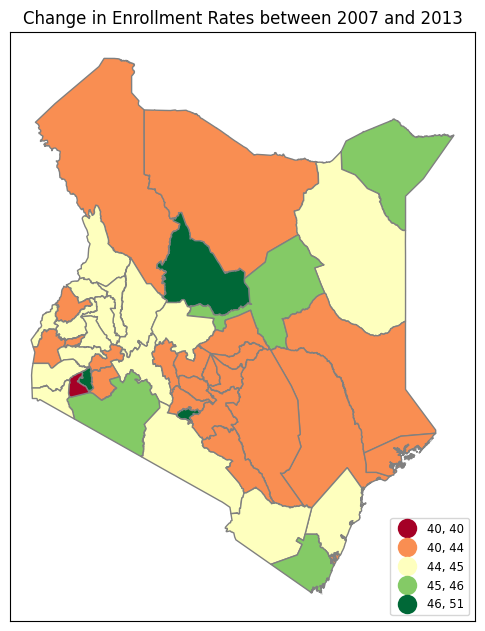

In [244]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties.plot(ax=ax,column='ECHANGE',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("Change in Enrollment Rates between 2007 and 2013")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


From the map above, it is evident that there was a significant increase in enrollment rate into secondary schools in Kenya between 2007 and 2013. It is important to note that during this period, the government introduced free primary education and also subsidized the secondary education. It is also worthnoting that the kenyan population has been growing steadily since the 1999 census. The rise in enrollment raises the question of sufficiency and accessibility to learning resources by students. Hypothetically, one can argue that one of the hurdles facing CBC revolves around the signficant rise in enrollment rates in schools, which exerts pressure in schools and definitely overwhelms the teachers and school management.         

In [245]:
!wget -q https://github.com/Brian13Noble/GIS/raw/main/2019-population_census-report-per-county.csv
kenya_popul = pd.read_csv('/content/2019-population_census-report-per-county.csv')
#kenya_pop



In [246]:
kenya_popul.loc[kenya_popul['County'] == 'Elgeyo-Marakwet', 'County'] = 'Keiyo-Marakwet'
kenya_popul.loc[kenya_popul['County'] == 'Tharaka-Nithi', 'County'] = 'Tharaka'
#kenya_pop

In [247]:
kenya_popul.dtypes

County                      object
Total_Population19          object
Male populatio 2019         object
Female population 2019      object
Households                  object
Av_HH_Size                   int64
LandArea                    object
Population Density          object
Population in 2009          object
Pop_change                  object
Intersex population 2019     int64
dtype: object

In [248]:
kenya_popul.rename(columns={'Population in 2009': 'Total_Population09'}, inplace=True)
kenya_popul.rename(columns={'Population Density': 'Population_Density'}, inplace=True)

In [249]:
#kenya_popul.dtypes

In [250]:
print(kenya_popul.columns)

Index(['County', 'Total_Population19', 'Male populatio 2019',
       'Female population 2019', 'Households', 'Av_HH_Size', 'LandArea',
       'Population_Density', 'Total_Population09', 'Pop_change',
       'Intersex population 2019'],
      dtype='object')


In [251]:
#Focus on important population variables
kenya_popul= kenya_popul[['County','Total_Population09', 'Total_Population19','LandArea','Population_Density']]
kenya_popul= kenya_popul.iloc[0:,:]
#kenya_popul

In [252]:
kenya_popul['Total_Population19'] = kenya_popul['Total_Population19'].str.replace(',', '').astype('int')
kenya_popul['LandArea'] = kenya_popul['LandArea'].str.replace(',', '').astype('int')
kenya_popul['Total_Population09'] = kenya_popul['Total_Population09'].str.replace(',', '').astype('int')
kenya_popul['Population_Density'] = kenya_popul['Population_Density'].str.replace(',', '').astype('int')

In [253]:
kenya_popul.dtypes

County                object
Total_Population09     int64
Total_Population19     int64
LandArea               int64
Population_Density     int64
dtype: object

In [254]:
kenya_popul['pop_change'] = (kenya_popul['Total_Population19'] - kenya_popul['Total_Population09'])  / kenya_popul['Total_Population19'] * 100

In [255]:
kenya_popul

,County,Total_Population09,Total_Population19,LandArea,Population_Density,pop_change
0,Baringo,555561,666763,10976,61,16.677890
1,Bomet,724186,875689,2531,346,17.301005
2,Bungoma,1630934,1670570,3024,552,2.372603
3,Busia,488075,893681,1696,527,45.385993
4,Keiyo-Marakwet,369998,454480,3032,150,18.588717
5,Embu,516212,608599,2821,216,15.180275
6,Garissa,623060,841353,44736,19,25.945471
7,Homa Bay,963794,1131950,3153,359,14.855426
8,Isiolo,143294,268002,25350,11,46.532489
9,Kajiado,687312,1117840,21871,51,38.514278


In [256]:
! wget -q -O kenya_counties1.zip https://github.com/Brian13Noble/GIS/raw/main/Kenya_Counties.zip
!ls
zip_ref = zipfile.ZipFile('kenya_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kenya_counties1=gpd.read_file('/content/County.shp') #load the shapefile with gpd as kenya_counties
#Make the map
#kenya_counties.plot()

 2019-population_census-report-per-county.csv
 2019-population_census-report-per-county.csv.1
 2019-population_census-report-per-county.csv.2
 2019-population_census-report-per-county.csv.3
 2019-population_census-report-per-county.csv.4
 2019-population_census-report-per-county.csv.5
 2019-population_census-report-per-county.csv.6
 County.dbf
 County.prj
 County.sbn
 County.sbx
 County.shp
 County.shp.xml
 County.shx
 kenya_administrative_province_boundaries.dbf
 kenya_administrative_province_boundaries.prj
 kenya_administrative_province_boundaries.shp
 kenya_administrative_province_boundaries.shx
 kenya_counties1.zip
 kenya_counties.zip
 kenya_prov.zip
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.1
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.2
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.3
 number-of-secondary-school-enrolment-by-county-2007-2013-c

In [257]:
kenya_counties1 = pd.merge(
    left=kenya_counties1,
    right=kenya_popul,
    left_on='COUNTY',
    right_on='County',
    how='outer', indicator=True
    )


In [258]:
kenya_counties[['COUNTY','County','_merge']]

,COUNTY,County,_merge
0,Turkana,Turkana,both
1,Marsabit,Marsabit,both
2,Mandera,Mandera,both
3,Wajir,Wajir,both
4,West Pokot,West Pokot,both
5,Samburu,Samburu,both
6,Isiolo,Isiolo,both
7,Baringo,Baringo,both
8,Keiyo-Marakwet,Keiyo-Marakwet,both
9,Trans Nzoia,Trans Nzoia,both


In [259]:
#kenya_counties1.dtypes

In [260]:
#print(kenya_counties.info())

<Axes: >

[]

[]

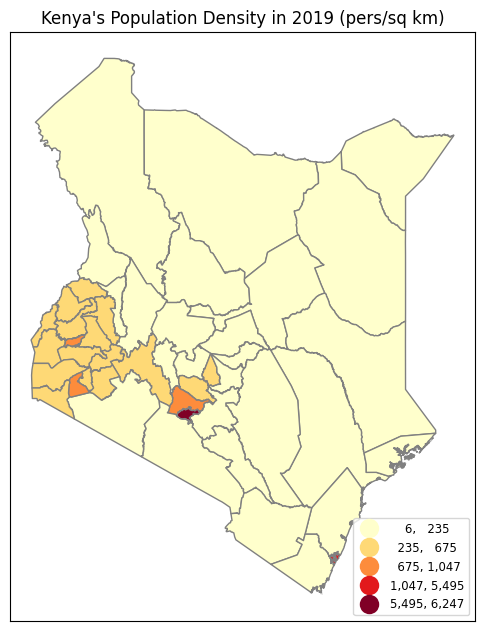

In [261]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties1.plot(ax=ax,column='Population_Density',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text("Kenya's Population Density in 2019 (pers/sq km)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks

The map shows the skewed distribution of population, which reflects in many schools in kenya. Notably, there are densey and sparsely populated regions in Kenya. Sparsely populated areas are mostly affected by insecurity, prolonged drought, and poor infrastructure. Such factors pose a great challenge in the implementation of the new Competence Based education curriculum in kenya

<Axes: >

[]

[]

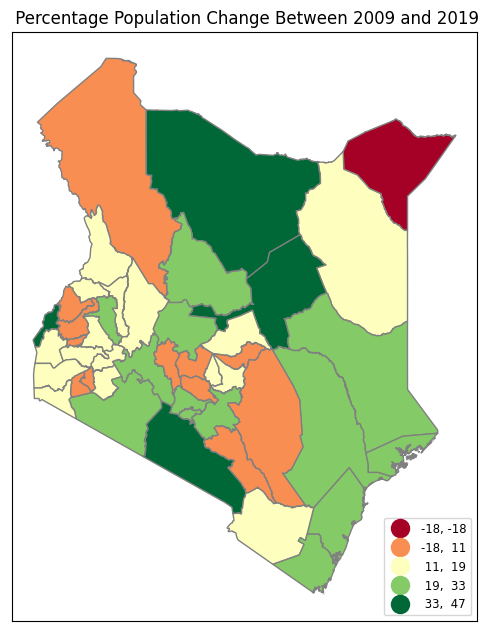

In [262]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties1.plot(ax=ax,column='pop_change',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
ax.title.set_text(" Percentage Population Change Between 2009 and 2019")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks


From the map above, it is evident that many counties in Kenya experienced an increase in population by more than 20% except Mandera county that experienced a decline in population. It is worth noting that Mandera county borders Somalia and therefore is affected by insecurity and prolonged drought. Such population changes also reflect in schools.  

<Axes: >

[]

[]

<Axes: >

[]

[]

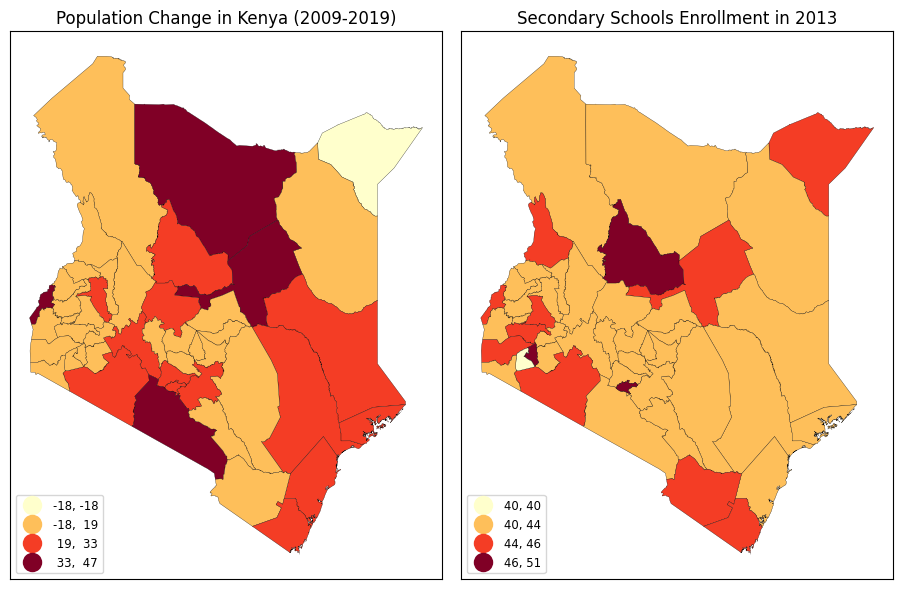

In [263]:
fig, axs = plt.subplots(1,2, figsize=(10,6),sharey=True, tight_layout=True)
kenya_counties1.plot(ax=axs[0],column='pop_change',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='black',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Population Change in Kenya (2009-2019)")
axs[0].set_xticks([]); axs[0].set_yticks([])

kenya_counties.plot(ax=axs[1],column='ECHANGE',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='black',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Secondary Schools Enrollment in 2013")
axs[1].set_xticks([]); axs[1].set_yticks([])

The population increase in 2019 in many counties in Kenya explains the significant improvement in enrollments in secondary schools experienced in 2013. Generally, some counties are more populated than others and that explains why the disparities in enrollment rates among counties in 2013. Generally, central and eastern counties have a higher population and high enrollment rates because of the conducive climatic conditions that favor agriculture, trade and urbanization.      

<Axes: >

[]

[]

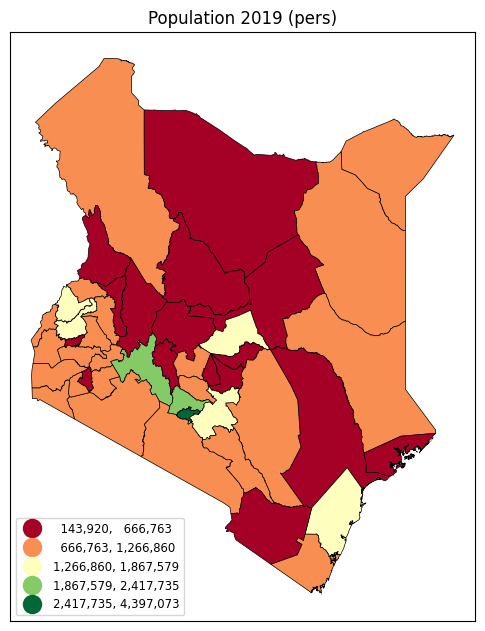

In [264]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties1.plot(ax=ax,column='Total_Population19',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Population 2019 (pers)")
ax.set_xticks([]); ax.set_yticks([])

The map shows that many counties in kenya had more that 500,000 persons as per the 2019 census. As a developing nations, the growth in population has both the merits and demerits. One of the demerits is the congestion in schools, which makes the school environment unconducive for majority of the learners.

In [265]:
#import numpy as np
kcP = kenya_counties1.copy()
kcP["geometry"] = kcP["geometry"].centroid

<ipython-input-265-44c910c65149>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kcP["geometry"] = kcP["geometry"].centroid


<Axes: >

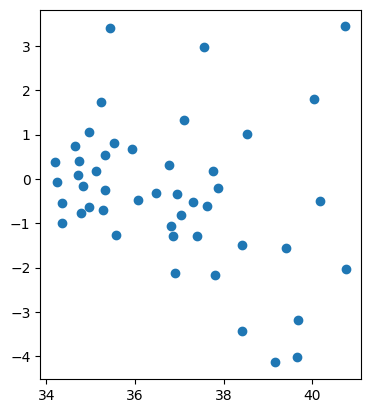

In [266]:
kcP.plot()

The plot shows that many central and south Eastern counties have a significantly higher population that other counties.

<Axes: >

[]

[]

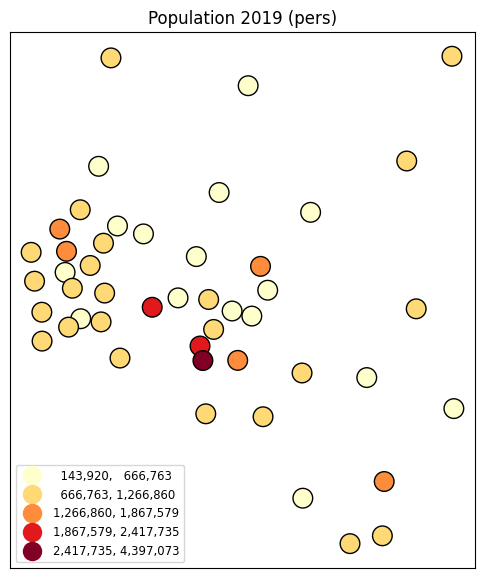

In [267]:
fig, ax = plt.subplots(1, figsize=(6,10))
kcP.plot(ax=ax,column='Total_Population19',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Population 2019 (pers)")
ax.set_xticks([]); ax.set_yticks([])

In [268]:
kenya_pop.dtypes

County                      object
Total_Population19          object
Male populatio 2019         object
Female population 2019      object
Households                  object
Av_HH_Size                   int64
LandArea                    object
Population Density          object
Population in 2009          object
Pop_change                  object
Intersex population 2019     int64
dtype: object

<Axes: >

<Axes: >

[]

[]

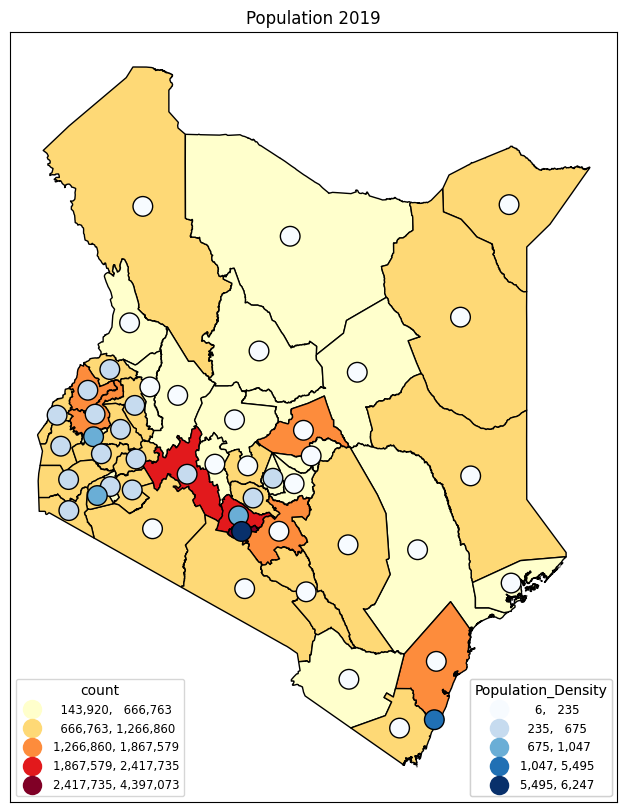

In [269]:
fig, ax = plt.subplots(1, figsize=(10,10))
kenya_counties1.plot(ax=ax,column='Total_Population19',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})

l1 = ax.get_legend()
l1.set_title('''count''')

kcP.plot(ax=ax,column='Population_Density',legend=True,cmap='Blues',scheme='natural_breaks',k=5,
         edgecolor='black',linewidth=1,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #

ax.title.set_text("Population 2019")
ax.set_xticks([]); ax.set_yticks([])

l2 = ax.get_legend()
l2.set_title('''density''')



ax.add_artist(l2)
ax.add_artist(l1)
l2.set_title('''Population_Density''')


Nairobi county, the capital city of Kenya and counties bordering the Lake Victoria region are densely populated compared to other counties.    

In [270]:
! wget -q -O kenya_prov.zip https://github.com/Brian13Noble/GIS/raw/main/kenya_administrative_province_boundaries.zip
!ls
zip_ref = zipfile.ZipFile('/content/kenya_prov.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kenya_prov=gpd.read_file('/content/kenya_administrative_province_boundaries.shp') #load the shapefile with gpd as kenya_counties
#Make the map
#kenya_prov.plot()


 2019-population_census-report-per-county.csv
 2019-population_census-report-per-county.csv.1
 2019-population_census-report-per-county.csv.2
 2019-population_census-report-per-county.csv.3
 2019-population_census-report-per-county.csv.4
 2019-population_census-report-per-county.csv.5
 2019-population_census-report-per-county.csv.6
 County.dbf
 County.prj
 County.sbn
 County.sbx
 County.shp
 County.shp.xml
 County.shx
 kenya_administrative_province_boundaries.dbf
 kenya_administrative_province_boundaries.prj
 kenya_administrative_province_boundaries.shp
 kenya_administrative_province_boundaries.shx
 kenya_counties1.zip
 kenya_counties.zip
 kenya_prov.zip
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.1
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.2
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.3
 number-of-secondary-school-enrolment-by-county-2007-2013-c

<Axes: >

<Axes: >

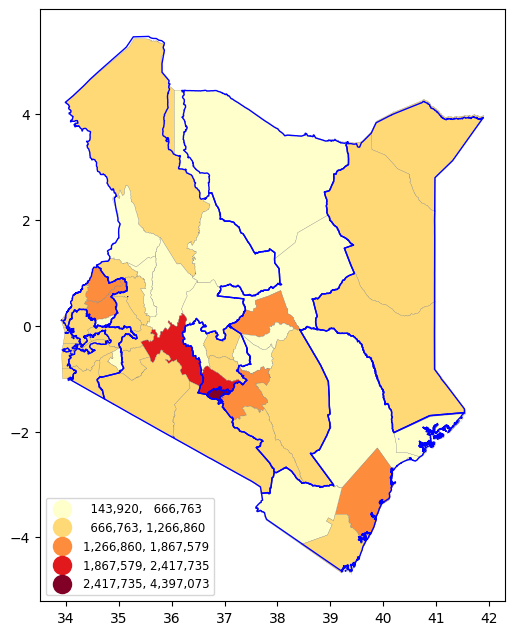

In [271]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties1.plot(ax=ax,column='Total_Population19',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4})
kenya_prov.plot(ax=ax,edgecolor='blue',linewidth=1, facecolor="none") #alpha=0.1)

From the map above the coast, central, and Nyanza provinces are densely populated. Generally, over the past 10 years, Kenya's population has grown significantly and that has resulted to the improvement of the economy. However, the distribution of the Kenyan population is affected mainly by climatic conditions, security, employment opportunities, availability of food and water, among others. Importantly, the downsides of population growth are evident in learning institutions. While there are many learners joining primary, secondary and university institutions, the county and national governments are striving to improve the quality of education. The primary challenge therefore facing the CBC education system in Kenya is scarcity of resources accelerated by growth of population that has significantly increased the enrollment rates.

In [272]:
!wget -q https://github.com/Brian13Noble/GIS/raw/main/primary%20school%20enrollment%20in%202019%20by%20county.xlsx
primary_enrollment = pd.read_excel('/content/primary school enrollment in 2019 by county.xlsx', skiprows=4)
primary_enrollment

,KENYA,10064301,5109583,4954718,10072040,5105788,4966252,-0.07689555389887484,0.07427220577491353,-0.23278822326517876
0,Mombasa,200140,99370,100770,155337,77728,77609,22.385830,21.779209,22.984023
1,Kwale,208512,106403,102109,203634,103499,100135,2.339434,2.729246,1.933228
2,Kilifi,375381,190072,185309,353254,175554,177700,5.894544,7.638158,4.106115
3,Tana River,55350,28122,27228,59674,30591,29083,-7.812105,-8.779603,-6.812840
4,Lamu,30722,15673,15049,32359,16518,15841,-5.328429,-5.391438,-5.262808
5,Taita-Taveta,67949,34844,33105,67177,34246,32931,1.136146,1.716221,0.525600
6,Garissa,71860,40904,30956,77465,42751,34714,-7.799889,-4.515451,-12.139811
7,Wajir,78332,43435,34897,76959,43883,33076,1.752796,-1.031426,5.218214
8,Mandera,104585,54796,49789,102503,64676,37827,1.990725,-18.030513,24.025387
9,Marsabit,67252,33750,33502,64787,32373,32414,3.665319,4.080000,3.247567


In [273]:
primary_enrollment.rename(columns={'KENYA': 'County'}, inplace=True)
primary_enrollment.rename(columns={10064301: 'census_total'}, inplace=True)
primary_enrollment.rename(columns={5109583: 'census_male'}, inplace=True)
primary_enrollment.rename(columns={4954718: 'census_Female'}, inplace=True)
primary_enrollment.rename(columns={10072040: 'Min_Total'}, inplace=True)
primary_enrollment.rename(columns={5105788: 'Min_Male'}, inplace=True)
primary_enrollment.rename(columns={4966252: 'Min_Female'}, inplace=True)
primary_enrollment.rename(columns={-0.07689555389887484: 'dev_Total'}, inplace=True)
primary_enrollment.rename(columns={0.07427220577491353: 'dev_Male'}, inplace=True)
primary_enrollment.rename(columns={-0.23278822326517876: 'dev_Female'}, inplace=True)
#primary_enrollment

In [274]:
primary_enrollment= primary_enrollment[['County','Min_Total', 'Min_Male','Min_Female','dev_Total']]
primary_enrollment= primary_enrollment.iloc[0:,:]
primary_enrollment

,County,Min_Total,Min_Male,Min_Female,dev_Total
0,Mombasa,155337,77728,77609,22.385830
1,Kwale,203634,103499,100135,2.339434
2,Kilifi,353254,175554,177700,5.894544
3,Tana River,59674,30591,29083,-7.812105
4,Lamu,32359,16518,15841,-5.328429
5,Taita-Taveta,67177,34246,32931,1.136146
6,Garissa,77465,42751,34714,-7.799889
7,Wajir,76959,43883,33076,1.752796
8,Mandera,102503,64676,37827,1.990725
9,Marsabit,64787,32373,32414,3.665319


In [275]:
primary_enrollment.loc[primary_enrollment['County'] == 'Nairobi City', 'County'] = 'Nairobi'
primary_enrollment.loc[primary_enrollment['County'] == 'Homabay', 'County'] = 'Homa Bay'
primary_enrollment.loc[primary_enrollment['County'] == 'Elgeyo-Marakwet', 'County'] = 'Keiyo-Marakwet'
primary_enrollment.loc[primary_enrollment['County'] == 'Tharaka-Nithi', 'County'] = 'Tharaka'
primary_enrollment.loc[primary_enrollment['County'] == 'Taita-Taveta', 'County'] = 'Taita Taveta'

In [276]:
#kenya_counties.dtypes

In [277]:
#kenya_counties.dtypes

In [278]:
! wget -q -O kenya_counties.zip https://github.com/Brian13Noble/GIS/raw/main/Kenya_Counties.zip
!ls
zip_ref = zipfile.ZipFile('kenya_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
kenya_counties=gpd.read_file('/content/County.shp') #load the shapefile with gpd as kenya_counties
#Make the map
#kenya_counties.plot()

 2019-population_census-report-per-county.csv
 2019-population_census-report-per-county.csv.1
 2019-population_census-report-per-county.csv.2
 2019-population_census-report-per-county.csv.3
 2019-population_census-report-per-county.csv.4
 2019-population_census-report-per-county.csv.5
 2019-population_census-report-per-county.csv.6
 County.dbf
 County.prj
 County.sbn
 County.sbx
 County.shp
 County.shp.xml
 County.shx
 kenya_administrative_province_boundaries.dbf
 kenya_administrative_province_boundaries.prj
 kenya_administrative_province_boundaries.shp
 kenya_administrative_province_boundaries.shx
 kenya_counties1.zip
 kenya_counties.zip
 kenya_prov.zip
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.1
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.2
 number-of-secondary-school-enrolment-by-county-2007-2013-csv-1.csv.3
 number-of-secondary-school-enrolment-by-county-2007-2013-c

In [279]:
# Merge shapefile with primary enrollment data
kenya_counties = pd.merge(
    left=kenya_counties,
    right=primary_enrollment,
    left_on='COUNTY',
    right_on='County',
    how='outer', indicator=True
)

In [280]:
kenya_counties[['COUNTY','County','_merge']]

,COUNTY,County,_merge
0,Turkana,Turkana,both
1,Marsabit,Marsabit,both
2,Mandera,Mandera,both
3,Wajir,Wajir,both
4,West Pokot,West Pokot,both
5,Samburu,Samburu,both
6,Isiolo,Isiolo,both
7,Baringo,Baringo,both
8,Keiyo-Marakwet,Keiyo-Marakwet,both
9,Trans Nzoia,Trans Nzoia,both


<Axes: >

[]

[]

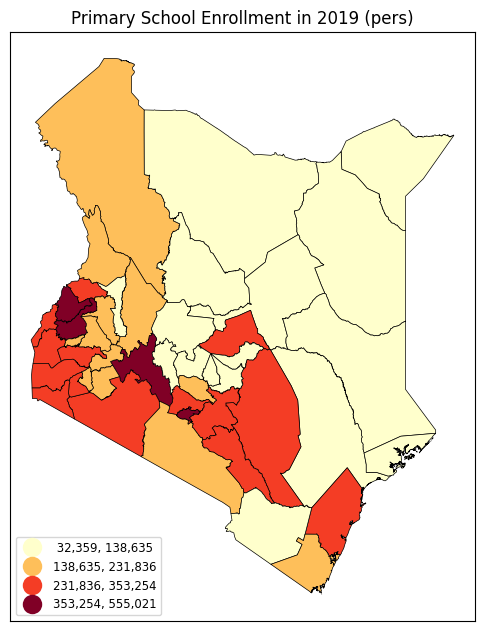

In [281]:
fig, ax = plt.subplots(1, figsize=(6,10))
kenya_counties.plot(ax=ax,column='Min_Total',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=4,
         edgecolor='black',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower left','title_fontsize':'medium','fontsize':'small','markerscale':1.4},
         markersize = 200) #
ax.title.set_text("Primary School Enrollment in 2019 (pers)")
ax.set_xticks([]); ax.set_yticks([])

The map also shows that the number and distribution of primary level learners is another significant challenge facing the new Kenyan education system. Notably, there are higher enrollments in counties with a high population density. The teacher-student ration is a major concern in Kenya, considering that highly populated counties require more teachers and support staff to effectively provide quality education. However, recruiting more teachers is costly and therefore, a huge gap exists in primary and secondary schools.  

** Resources **
https://data.humdata.org/dataset/kenya-population-per-county-from-census-report-2019?

https://www.knbs.or.ke/data-tables/

https://map.igismap.com/gis-data/kenya/administrative_national_boundary

https://data.world/

